# FIT9136 Algorithms and programming foundations in Python 

# Week 5 Lab Activities: Concepts of Decomposition and Abstract Data Types I

<small>\#fileIO \#function \#class \#variableScope \#method</small>

## Lab Setup: File I/O

Before we start today's lab, we have to learn how to read from or write onto a file using python. Below, we have a variable `dummy_xml` that stores a multi-line string.

In [1]:
dummy_xml = """<book id="bk101">
    <author>Gambardella, Matthew</author>
    <title>XML Developer's Guide</title>
    <genre>Computer</genre>
    <price>44.95</price>
    <publish_date>2000-10-01</publish_date>
    <description>An in-depth look at creating applications with XML.</description>
</book>
<book class="new-book" id="bk102">
    <author>Ralls, Kim</author>
    <title>Midnight Rain</title>
    <genre>Fantasy</genre>
    <price>5.95</price>
    <publish_date>2000-12-16</publish_date>
    <description>A former architect battles corporate zombies, an evil sorceress, and her own childhood to become queen of the world.</description>
</book>
<book id="bk103">
    <author>Corets, Eva</author>
    <title>Maeve Ascendant</title>
    <genre>Fantasy</genre>
    <price>5.95</price>
    <publish_date>2000-11-17</publish_date>
    <description>After the collapse of a nanotechnology society in England, the young survivors lay the foundation for a new society.</description>
</book>
<book class="featured-book" id="bk104">
    <author>Corets, Eva</author>
    <title>Oberon's Legacy</title>
    <genre>Fantasy</genre>
    <price>5.95</price>
    <publish_date>2001-03-10</publish_date>
    <description>In post-apocalypse England, the mysterious agent known only as Oberon helps to create a new life for the inhabitants of London. Sequel to Maeve Ascendant.</description>
</book>"""

Now, we want to export to a file named "dummy_xml"(without any file extension). This is how we do it:
1. Create a file object by `open` function under `w`(write) mode.
2. Write the string to the opened file by the `write` method of file object.
3. Close the file (automatically done after the `with` block)

In [2]:
# f is file object created by open() function
# try ?open
with open('dummy_xml', 'w') as f:
    f.write(dummy_xml)
    print(f.write)

<built-in method write of _io.TextIOWrapper object at 0x000001D9777B5C70>


Next, we will read the file and get the contents of it:
1. Open the file
2. Read the content
3. Close the file (automatically done after the `with` block)

In [3]:
# opening 'dummy_xml' file using 'r' mode of open() function
with open('dummy_xml', 'r') as f:
    dummy_xml = f.read() # read() method of a file object will return the whole text from the file
    print(dummy_xml)

<book id="bk101">
    <author>Gambardella, Matthew</author>
    <title>XML Developer's Guide</title>
    <genre>Computer</genre>
    <price>44.95</price>
    <publish_date>2000-10-01</publish_date>
    <description>An in-depth look at creating applications with XML.</description>
</book>
<book class="new-book" id="bk102">
    <author>Ralls, Kim</author>
    <title>Midnight Rain</title>
    <genre>Fantasy</genre>
    <price>5.95</price>
    <publish_date>2000-12-16</publish_date>
    <description>A former architect battles corporate zombies, an evil sorceress, and her own childhood to become queen of the world.</description>
</book>
<book id="bk103">
    <author>Corets, Eva</author>
    <title>Maeve Ascendant</title>
    <genre>Fantasy</genre>
    <price>5.95</price>
    <publish_date>2000-11-17</publish_date>
    <description>After the collapse of a nanotechnology society in England, the young survivors lay the foundation for a new society.</description>
</book>
<book class="featured-b

It is **strongly suggested** to have a more detailed look into `open()` function [here](https://docs.python.org/3/library/functions.html#open), and the methods of file object [here](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files).



## A. Functions

### 1. Intro: Every chaos starts with a long piece of code

*Let's start this lab with a simple question: Can you explain the following code at a glance?*

In [3]:
xml_books = [i for i in dummy_xml.split('</book>') if i] # separating book items from dummy_xml
books = []
print(xml_books)

['<book id="bk101">\n    <author>Gambardella, Matthew</author>\n    <title>XML Developer\'s Guide</title>\n    <genre>Computer</genre>\n    <price>44.95</price>\n    <publish_date>2000-10-01</publish_date>\n    <description>An in-depth look at creating applications with XML.</description>\n', '\n<book class="new-book" id="bk102">\n    <author>Ralls, Kim</author>\n    <title>Midnight Rain</title>\n    <genre>Fantasy</genre>\n    <price>5.95</price>\n    <publish_date>2000-12-16</publish_date>\n    <description>A former architect battles corporate zombies, an evil sorceress, and her own childhood to become queen of the world.</description>\n', '\n<book id="bk103">\n    <author>Corets, Eva</author>\n    <title>Maeve Ascendant</title>\n    <genre>Fantasy</genre>\n    <price>5.95</price>\n    <publish_date>2000-11-17</publish_date>\n    <description>After the collapse of a nanotechnology society in England, the young survivors lay the foundation for a new society.</description>\n', '\n<book

In [5]:
for xml_book in xml_books: # iterate through the book items
    book = {} # for each book, create a dictionary
    lines = xml_book.split('\n') # each book has multiple lines, we read it line by line by splitting with newline character '\n'
lines

['',
 '<book class="featured-book" id="bk104">',
 '    <author>Corets, Eva</author>',
 "    <title>Oberon's Legacy</title>",
 '    <genre>Fantasy</genre>',
 '    <price>5.95</price>',
 '    <publish_date>2001-03-10</publish_date>',
 '    <description>In post-apocalypse England, the mysterious agent known only as Oberon helps to create a new life for the inhabitants of London. Sequel to Maeve Ascendant.</description>',
 '']

In [8]:
for line in lines: # for each line of the current book
        line = line.strip() # remove all leading and trailing spaces
        print(line)


<book class="featured-book" id="bk104">
<author>Corets, Eva</author>
<title>Oberon's Legacy</title>
<genre>Fantasy</genre>
<price>5.95</price>
<publish_date>2001-03-10</publish_date>
<description>In post-apocalypse England, the mysterious agent known only as Oberon helps to create a new life for the inhabitants of London. Sequel to Maeve Ascendant.</description>



In [28]:
xml_books = [i for i in dummy_xml.split('</book>') if i] # separating book items from dummy_xml
books = []

for xml_book in xml_books: # iterate through the book items
    book = {} # for each book, create a dictionary
    lines = xml_book.split('\n') # each book has multiple lines, we read it line by line by splitting with newline character '\n'
    for line in lines: # for each line of the current book
        line = line.strip() # remove all leading and trailing spaces
        if line.startswith('<book'): # obtain the book id
            book['id'] = line[-7:-2]
        if 'id' in book and line.startswith('<author>'): # obtain author and remove non-alphabet characters
            author = line.strip('<author>').strip('</author>')  #有两个东西 
            author_clean = ''
            for char in author:
                if char.isalpha() or char == ' ':
                    author_clean += char
            book['author'] = author_clean # add author info into the dictionary
        if 'id' in book and line.startswith('<title>'): # obtain title and remove non-alphabet characters
            title = line.strip('<title>').strip('</title>')
            title_clean = ''
            for char in title:
                if char.isalpha() or char == ' ':
                    title_clean += char
            book['title'] = title_clean # add title info into the dictionary
    books.append(book)

print('['  + ',\n'.join(str(book) for book in books) + ']')

[{'id': 'bk101', 'author': 'Gambardella Matthew', 'title': 'XML Developers Guid'},
{'id': 'bk102', 'author': 'Ralls Kim', 'title': 'Midnight Rain'},
{'id': 'bk103', 'author': 'Corets Ev', 'title': 'Maeve Ascendan'},
{'id': 'bk104', 'author': 'Corets Ev', 'title': 'Oberons Legacy'}]


It is quite challenging, isn't it? 

Yes, it is often a headache to read a long piece of code. 




### 2. What is the problem?

The code above is like a very lengthy essay without any paragraphs or sections. 

It is essential for us to break it down into smaller parts. This concept is also known as **modularisation**.

In computer programming, **function** is the key of code modularisation. Below is the syntax of a python function:

```python
def function_name(arguments): # arguments are optional
    # do something
    return something # optional, if no return statement, the function will return None
```

A **<font color='blue'>function</font>**: 
1. takes in arguments as a set of variables
2. perform operations based on arguments
3. return the resulting values after operations


A function is often created to perform repetitive tasks on different variables(arguments). 

When we want to perform the task, we can simply call the function by `function_name(arguments)`.

This idea is particularly handy when we want to do the task for 100000 times. Instead of *copying the code for 100000 times*, we can simply write the function for *1 time* and call it for 100000 times!

Using functions can also make debugging easier because we can test each function one by one. 

Furthermore, with the repetitive code eliminated, we don't have to modify the code with same logic for multiple times.

### 3. Reusing Functions

From the example code above, can you spot out some repetitive parts?

We can actually see that the process of extracting author and title are essentially the same.

```python
# extracting author
author = line.strip('<author>').strip('</author>')
author_clean = ''
for char in author:
    if char.isalpha() or char == ' ':
        author_clean += char
```
```python
# extracting title
title = line.strip('<title>').strip('</title>')
title_clean = ''
for char in title:
    if char.isalpha() or char == ' ':
        title_clean += char
```

We can summarise and transform them into the following code:
```python
item = line.strip('<' + tag + '>').strip('</' + tag + '>')
item_clean = ''
for char in item:
    if char.isalpha() or char == ' ':
        item_clean += char
```
where:
1. `line` is a variable, which contains the current line string
2. `tag` is a variable, which can be 'title' or 'author'

We can see that `line` and `tag` are pre-defined variables, so they will be arguments of the function.

<br>

**Finally**, we can wrap the code above by a function. 

In this example, we have defined `line` and `tag` as [positional arguments](https://docs.python.org/3/glossary.html#term-argument).
```python
def get_tag_content(line, tag):
    item = line.strip('<' + tag + '>').strip('</' + tag + '>')
    item_clean = ''
    for char in item:
        if char.isalpha() or char == ' ':
            item_clean += char
    return item_clean
```

The modularised code will be as follows:

In [11]:
xml_books = [i for i in dummy_xml.split('</book>') if i] # separating book items from dummy_xml

def get_tag_content(line, tag) -> str:
    """
    Obtain all alphabetic characters of a string within a pair of xml tags
    Args:
        1. line(str): an xml string that starts and ends with the same tag
        2. tag(str): the tag name
    Returns:
        1. str: the cleaned tag content
    """
    item = line.strip('<' + tag + '>').strip('</' + tag + '>')
    item_clean = ''
    # remove all no alphabetic characters
    for char in item:
        if char.isalpha() or char == ' ':
            item_clean += char
    return item_clean

books = []
for xml_book in xml_books:
    book = {}
    lines = xml_book.split('\n') # split book items
    for line in lines:
        line = line.strip()
        if line.startswith('<book'): # obtain book id
            # is this a good approach to get the id? This is a bit "hardcoding"!
            # we are assuming the LAST 7th to 3rd characters must be the book id
            book['id'] = line[-7:-2] 
        if 'id' in book and line.startswith('<author>'): # obtain author name
            book['author'] = get_tag_content(line, 'author')
        if 'id' in book and line.startswith('<title>'): # obtain book title
            book['title'] = get_tag_content(line, 'title')
    books.append(book)

print('['+ ',\n'.join(str(book) for book in books) + ']')

[{'id': 'bk101', 'author': 'Gambardella Matthew', 'title': 'XML Developers Guid'},
{'id': 'bk102', 'author': 'Ralls Kim', 'title': 'Midnight Rain'},
{'id': 'bk103', 'author': 'Corets Ev', 'title': 'Maeve Ascendan'},
{'id': 'bk104', 'author': 'Corets Ev', 'title': 'Oberons Legacy'}]


Now, it looks much better!

<b><font color='red'>Task 1:</font></b> Can you add two lines of code to extract the cleaned 'genre' of each book?

<b><font color='red'>Solution</font></b>

Simply add the code below **after** `book['title'] = get_tag_content(line, 'title')`.
```python
        if 'id' in book and line.startswith('<genre>'): # obtain book genre
            book['genre'] = get_tag_content(line, 'genre')
```

<b><font color='red'>Task 2:</font></b> From the code above, we are obtaining the book id simply by getting the string from specific index range(`line[-7:-2]`). However, this method is not flexible at all. For the book below, we can see that the book id is not located between indices -7(inclusive) and -2(exclusive). Can you write a function that can help us retrieving the book id(or even other attributes, e.g. class, within the xml tag) correctly?

<pre>
<b>&lt;book id="bk105" class="normal"&gt;</b>
    &lt;author&gt;Corets, Eva&lt;/author&gt;
    &lt;title&gt;The Sundered Grail&lt;/title&gt;
    &lt;genre&gt;Fantasy&lt;/genre&gt;
    &lt;price&gt;5.95&lt;/price&gt;
    &lt;publish_date&gt;2001-09-10&lt;/publish_date&gt;
    &lt;description&gt;The two daughters of Maeve, half-sisters, battle one another for control of England. Sequel to Oberon's Legacy.&lt;/description&gt;
&lt;/book&gt;
</pre>

<b><font color='red'>Solution</font></b>

In [4]:
def get_attr(line, attr_name) -> str or bool:
    """
    Obtain the value of required attribute within an xml tag
    Args:
        1. line(str): an xml string that contains the required attibute within an xml tag
        2. attr_name(string): the name of attribute
    Returns:
        1. str or False: the value of required attribute, or False if none found
    """
    tag_content = line.split('>')[0] # get the tag content, which is before the first occurance of '>' character
    tag_attribute = tag_content.split() # split the tag content by space, will get different attribute separately
    for att in tag_attribute:
        key_values = att.split('=') # split each attribute string by '=' character, the first item is the key, the second item is the value
        if len(key_values) != 2:
            continue # if we don't get 2 elements after splitting by '=', then we won't get a valid key-value pair
        if key_values[0] == attr_name: # if the key is the required attribute, then we get the value
            value = key_values[1]
            value = value[1:-1] # remove the "s
            return value
    return False # if nothing is found

In [6]:
get_attr(test_string,'id')

'bk105'

In [5]:
# demo
test_string = '<book id="bk105" class="normal">This is a book</book>'
print(f"get_attr(test_string, 'id') : {repr(get_attr(test_string, 'id'))}")
print(f"get_attr(test_string, 'class') : {repr(get_attr(test_string, 'class'))}")
print(f"get_attr(test_string, 'random') : {repr(get_attr(test_string, 'random'))}")

get_attr(test_string, 'id') : 'bk105'
get_attr(test_string, 'class') : 'normal'
get_attr(test_string, 'random') : False


### 4. Variable scope

Variable scope can be a tricky issue when it comes to modularisation. 

Long story short, a variable defined in different "level" *may not* be accessible within the function, because a variable has its own *lifetime*.

#### 4.1 Local scope

A variable created inside a function. It can only be accessible within the function.

Guess the outputs of the following code cells below!

In [ ]:
# Example 1
def a_fun():
    local_var = 1 # a local variable defined within a_fun
    print(f'within a_fun: {local_var}') # getting local_var within the function

a_fun()
print(f'outside a_fun: {local_var}') # getting local_var outside the function

In [ ]:
# Example 2
def a_fun():
    local_var = 1 # a local variable defined within a_fun
    print(f'within a_fun: {local_var}') # getting local_var within the function
    b_fun()

def b_fun():
    print(f'within b_fun: {local_var}') # getting local_var outside a_fun

a_fun()

#### 4.2 Global scope

A variable created in the main body of the code is accessible everywhere.

In [ ]:
global_var = 1

def a_fun():
    print(f'global_var inside a_fun = {global_var}')

a_fun()
print(f'global_var in main body = {global_var}')

#### 4.3 Making local variables global

Want to create or reference to a global variable inside a function? <font color='blue'>```global```</font> keyword is the solution.

In [ ]:
# Example 1 - CHANGING value of global variable inside function
x = 1

def a_fun():
    global x # make variable x within this function reference to the global variable x
    x = 2 # changing the value of x to 2

a_fun()
print(f'x after a_fun = {x}')

In [ ]:
# Example 2 - CREATING a global variable inside function
def a_fun():
    global y # create a new global variable y
    y = 2 # assigning the value of x to 2

a_fun()
print(f'y after a_fun = {x}')

## B. Class

A Class is where we hold everything together.

So far, the programming style we have learnt is called **procedural programming**, which contains steps of instrunctions for the computer to run.

Now, we will explore another programming style, **object-oriented programming**. 

Remember in week 2 we have mentioned "Everything in Python is an object"? *We are here building the flesh to contain the soul.* 

### 1. How would you describe an object?

Let's say... a laptop. 

<font color='red'>**Question:**</font> How would you describe a laptop?

<font color='red'>**Answer:**</font> 

**Features**
- Brand
- Colour
- Weight
- Specification, e.g. Intel® Core™ i7-11370H Quad Core Processor 3.3-4.8 GHz
- Serial Number
- SKU
- etc.

**Functionality**
- Browse the web
- Play videos
- Run PC games
- Programming
- ZOOM
- etc.

### 2. Implementing the object using Class

This is how we can do it: 

- **Features** will be transformed to **variables**, which *can* be initialised in the magic \_\_init\_\_ method(constructor).
- **Functionality** will be transformed into **methods**(functions inside a Class).

**NOTE:** Please read more about *magic methods* [here](https://docs.python.org/3/reference/datamodel.html#basic-customization)(Section 3.3.1).

Let's create a simple Laptop Class now.

In [9]:
class Laptop:
    def __init__(self, brand):
        self.brand = brand
        self.colour = ''
    def play_video(self, id):
        from IPython.display import YouTubeVideo
        display(YouTubeVideo(id, width=800, height=400))

We can see the Class Laptop is created with the keyword <font color='blue'>`class`</font>. There are two methods in this Class, which are the constructor(\_\_init\_\_) and play_video.

<font color='red'>**Question:**</font> But wait! What is the mysterious `self`?

<font color='red'>**Answer:**</font> 

- `self` is a variable referencing to the instance itself, when we create an instance of the Class.

- The variables with prefix "`self.`" are called **instance variables**. The values are *attached* to the instance rather than the Class.

- `self` is always put as the first argument when we define a Class method.

- And of course, `self` is just a name. You can change it to other names, although it is *not preferred*.

### 3. Creating an instance

Let's create a Laptop instance here.

In [10]:
# Creating a new Laptop instance and assign to the variable mbp
# 'Apple' is the value passing to the constructor method as brand argument
mbp = Laptop('Apple')

### 4. Calling a method of an instance

Since we have defined play_video already, let's try calling it.

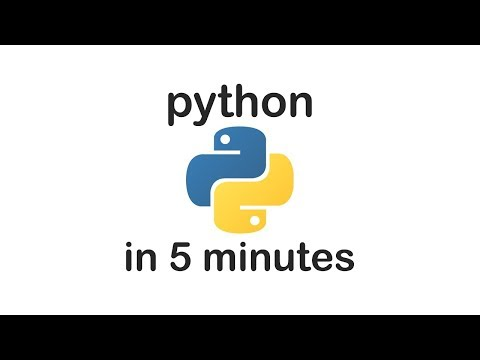

In [10]:
mbp.play_video('I2wURDqiXdM') # I2wURDqiXdM is the value for the id argument

### 5. Class variables

Class variables are the variables which the values are shared among all instance of the same Class.

They are defined within the Class, but outside of any methods.

In [11]:
class OneClass:
    class_variable = 'is defined here without self'
    def __init__(self):
        OneClass.class_variable = 'is accessible by adding the class name as the prefix'
        self.class_variable = 'is an instance variable'

In [12]:
# What will be printed?
print(OneClass.class_variable)

is defined here without self


In [13]:
# What will be printed?
an_instance = OneClass()
print(f'OneClass.class_variable = {OneClass.class_variable}')
print(f'an_object.class_variable = {an_instance.class_variable}')

OneClass.class_variable = is accessible by adding the class name as the prefix
an_object.class_variable = is an instance variable


## C. In-class practice

### Pythonlympics - Swimming

In this task, we will build a project to simulate a swimming competition <small>(with some animation)</small>. 

Please follow the instructions below carefully and implement them correctly.

#### I. Swimmer Class

First of all, a race must have its swimmers. Let us create a Swimmer Class.

In this class, there will be a **constructor** that asks user to input the name and initialise the instance variable `name` with the value of the input.

There are the **other 2 methods** for Swimmer class, which is described in the docString of the Swimmer class.

Let's complete the Swimmer class below.

In [13]:
class Swimmer:
    """
    A class to represent a swimmer.
    ...
    Attribute
    ----------
    name(str): name of the person

    Methods
    -------
    get_name():
        Returns the name of swimmer
    
    set_name():
        Asks for user input and changes the name of swimmer with the input
    """
    def __init__(self):
        """Asks for user input and initialises the name of swimmer."""
        self.name = input("Please enter the name of this swimmer: ")

    def get_name(self):
        """
        Returns the name of swimmer.
        Returns:
            1. str : name of swimmer
        """
        return self.name

    def set_name(self):
        """Asks for user input and changes the name of swimmer."""
        self.name = input("Please enter the updated name of this swimmer: ")

#### II. Pool Class

The second essential element for a swimming competition is, of course, a pool. 

There are 2 methods for Pool class, which are provided below.

In [17]:
from IPython.display import clear_output
clear_output(wait=True)

In [24]:
from IPython.display import clear_output
class Pool:
    """
    A class to represent a swimming pool.
    ...
    Attribute
    ----------
    dist(int): The length of the pool.

    Methods
    -------
    show_pool():
        Prints the pool and the progress of each swimmer.
    """
    def __init__(self, dist):
        """Constructs all the necessary attributes for the pool object."""
        self.dist = dist
    
    def show_pool(self, progress):
        """
        Prints the pool and the progress of each swimmer.
        Args:
            1. progress( list(tuple(Swimmer,int)) ): a list of tuples, where the first item is a Swimmer instance and second item is the total distance of the swimmer swam
        """
        clear_output(wait=True) 

        print('\t\t' + '┌' + '─' * self.dist + '┐')
        lines = []
        for player in progress:
            lines.append(player[0].get_name() + '\t' * (2 - round(len(player[0].get_name()) // 10)) +  '│' + '█' * min(player[1], self.dist) + ' ' * (self.dist - min(player[1], self.dist)) + '│')
        print(('\n\t\t' + '├' + '─' * self.dist + '┤\n').join(lines))  #用这个每一行分开
        print('\t\t' + '└' + '─' * self.dist + '┘')

In [32]:
print(('\n\t\t' + '├' + '─' * 10 + '┤\n'))


		├──────────┤



#### III. SwimGame Class

Finally, we have the race itself. 

In SwimGame Class, the main body start_game() is already implemented.

However, we still need create and initialise several instance variables in the **constructor** method following the descriptions in the docString. 

Next, we also have to create the **reset_game** method to reset some instance variables based on the descriptions.

In [26]:
from random import randint
import time
class SwimGame:
    """
    A class to represent a swimming race.
    ...
    Attribute
    ----------
    swimmers(list(Swimmer)): A list of num_swimmer Swimmer instances.
    dist(int): Pool length.
    progress(list(tuple(Swimmer,int))): a list of tuples, where the first item is a Swimmer instance and second item is the total distance of the swimmer swam
    pool(Pool): Pool instance.

    Methods
    -------
    start_game():
        Simulates the race.
    reset_game():
        Resets the progress to 0 for all Swimmers.
    """
    def __init__(self, num_swimmer, dist):
        """
        Constructs all the necessary attributes for the SwimGame object.
        Args:
            1. num_swimmer(int): number of swimmers in the race.
            2. dist(int): pool distance.
        """
        self.swimmers = []
        self.dist = dist
        
        for _ in range(num_swimmer):
            self.swimmers.append(Swimmer())

        self.progress = [[swimmer, 0] for swimmer in self.swimmers]
        self.pool = Pool(dist)
        

    def start_game(self):
        """
        Where the game starts.
        """
        finish = [] # A list to store the finishing order of different Swimmers
        speeds = [6] * len(self.progress) # storing the current steps of each swimmer, initialised as 6 for every Swimmer
        while not all([p[1] >= self.dist for p in self.progress]): # while there is still any swimmer not finished
            caption = [] # A list to store all the captions for this step
            finish_this_round = [] # A list to store all swimmers finishing in the current step, an item will be tuple(Swimmer instnace, current step)
            for i, swimmer in enumerate(self.progress): # i is the Swimmer index, swimmer is list(Swimmer instance, total step)
                if swimmer[0] in finish: # if the Swimmer has finished, we skip this swimmer
                    continue
                if swimmer[1] < self.dist: # otherwise, still not finished
                    step = randint(max(speeds[i] - 4, 1), min(speeds[i] + 2, 8)) # assign a random step for the swimmer, with a bit of momentum considered based on the last step
                    speeds[i] = step # update the current step
                    swimmer[1] += step # update the total step of Swimmer
                    # Add some caption if the Swimmer is too fast/slow
                    if step >= 6: 
                        caption.append(f'{swimmer[0].get_name()} is swimming FAST!')
                    if step <= 2:
                        caption.append(f'{swimmer[0].get_name()} is slowing down!')
                if swimmer[1] >= self.dist and swimmer[0] not in finish: # if the swimmer finishing in this round, append to finish_this_round list
                    finish_this_round.append((swimmer[0],step))
                finish_this_round = sorted(finish_this_round,key=lambda x: x[1],reverse=True) # sort finish_this_round with the current step, Swimmer with bigger current step ranks first
            for p in finish_this_round: # Add the Swimmers finishing this round to finish list, order is preserved
                finish.append(p[0])
            self.pool.show_pool(self.progress) # Of course, display the pool in after every step
            print('\n'.join(caption)) # Add some caption after that
            time.sleep(0.1) # stop the program for 0.7s to show the change of the steps
        print('rank:') # show the ranks, its recorded in finish list
        for i, swimmer in enumerate(finish):
            print(f'{i+1}\t{swimmer.get_name()}')
        
    def reset_game(self):
        """
        Place every Swimmer to the start of the pool.
        """
        self.progress = [[swimmer, 0] for swimmer in self.swimmers] # reset the total steps of each Swimmer to 0

#### IV. Let the race begin

Finally, it's the moment of truth. Let us create a SwimGame instance and let the race begin!

In [27]:
game = SwimGame(5,60) # create a race with 5 candidates in a 60 unit length pool
game.start_game() # race start!!

		┌────────────────────────────────────────────────────────────┐
1		│████████████████████████████████████████████████████████████│
		├────────────────────────────────────────────────────────────┤
2		│████████████████████████████████████████████████████████████│
		├────────────────────────────────────────────────────────────┤
3		│████████████████████████████████████████████████████████████│
		├────────────────────────────────────────────────────────────┤
4		│████████████████████████████████████████████████████████████│
		├────────────────────────────────────────────────────────────┤
5		│████████████████████████████████████████████████████████████│
		└────────────────────────────────────────────────────────────┘

rank:
1	3
2	5
3	4
4	1
5	2


## D. Exercise

### 1. Tic-Tac-Toe

Tic-Tac-Toe is a grid based game where 1 players wins if their symbols make a straight line on a 3x3 board. Players take turns placing 1 symbol down until either there is a winner or no more moves can be made (if you have not played Tic-Tac-Toe, a quick google search is in order.)

Try making your board using lists of lists. By making your grid in this way, you are able to refer to a location using Cartesian coordinates (x and y coordinates like on a graph).

In order to play the game, you will need to make a menu, and implement victory checks.

Note: this is a very big task. Try your best with it, and at a minimum, make a working grid that can be printed.

In [1]:
from IPython.display import clear_output

class TTTGameBoard:
    """
    A class to represent the Tic-Tac-Toe game board.
    ...
    Attribute
    ----------
    board_repr(str): The string to display the board with placeholders to store the moves of players.
    board_list(list(list(str))): A 2-dimensional list to store the board states in a row-column manner.

    Methods
    -------
    print_board():
        Print current board state.
    update_board(row, col, symbol):
        Set board_list[row][col] to symbol.
    check_win():
        Check if there is a winner in the current state.
    get_symbol(row, col):
        Returns the symbol in board_list[row][col].
    """
    def __init__(self):
        """Constructs all the necessary attributes for the TTTGameBoard object."""
        self.board_repr = """
  col\t0\t\t1\t\t2\t
row\t\t│\t\t│\t\t
0\t{}\t│\t{}\t│\t{}\t
 \t\t│\t\t│\t\t
 ───────────────┼───────────────┼────────────────
\t\t│\t\t│\t\t
1\t{}\t│\t{}\t│\t{}\t
 \t\t│\t\t│\t\t
 ───────────────┼───────────────┼────────────────
\t\t│\t\t│\t\t
2\t{}\t│\t{}\t│\t{}\t
 \t\t│\t\t│\t\t
"""
        self.board_list = [['-' for j in range(3)] for i in range(3)]
    
    def print_board(self):
        """Print current board state."""
        clear_output(wait=True)
        board_list_flattened = []
        for row in self.board_list:
            board_list_flattened.extend(row)
        print(self.board_repr.format(*board_list_flattened))
    
    def update_board(self, row, col, symbol):
        """
        Set board_list[row][col] to symbol.
        Args:
            1. row(int): row index.
            2. col(int): column index
            3. symbol(str): player symbol.
        """
        self.board_list[row][col] = symbol

    def check_win(self):
        """
        Check if there is a winner in the current state.
        Returns:
            str or bool: if there is a winner, returns the winner symbol. Returns False otherwise.
        """
        win_cases = [set(self.board_list[i][j] for j in range(3)) for i in range(3)] # same row
        win_cases += [set(self.board_list[i][j] for i in range(3)) for j in range(3)] # same column
        win_cases += [set(self.board_list[i][i] for i in range(3)), set(self.board_list[i][2-i] for i in range(3))] # diagonal
        for win_case in win_cases:
            if len(win_case) == 1 and '-' not in win_case:
                return win_case.pop()
        return False
    
    def get_symbol(self, row, col):
        """
        Returns the symbol in board_list[row][col].
        Args:
            1. row(int): row index.
            2. col(int): column index.
        Returns:
            str: the symbol in board_list[row][col]
        """
        return self.board_list[row][col]

In [2]:
class TTTPlayer:
    """
    A class to represent a player.
    ...
    Attribute
    ----------
    symbol(str): the symbol that represents the player

    Methods
    -------
    place_token(board):
        Ask for user input and place the symbol on the board.
    """
    def __init__(self, symbol):
        """
        Constructs all the necessary attributes for the TTTPlayer object.
        Args:
            1. symbol(str): symbol that represents the player.
        """
        self.symbol = symbol
    
    def place_token(self, board):
        """
        Ask for user input and place the symbol on the board.
        Args:
            1. board(TTTGameBoard): a TTTGameBoard instance
        """
        # ask for user input
        row = input('Please enter row index: ')
        col = input('Please enter column index: ')
        # verify user input and ask for user input repetitively until the user input is valid
        while (not row.isdigit() or
               not col.isdigit() or
               not int(row) in range(3) or
               not int(col) in range(3) or
               board.get_symbol(int(row),int(col)) != '-'):
            print('Your input is invalid. Please try again.')
            row = input('Please enter row index: ')
            column = input('Please enter column index: ')
        # update the board with the valid input
        board.update_board(int(row),int(col),self.symbol)


In [3]:
class TTTGame:
    """
    A class to represent a Tic-Tac-Toe Game.
    ...
    Attribute
    ----------
    players(list(TTTPlayer)): a list of 2 TTTPlayer instances.
    board(TTTGameBoard): a TTTGameBoard instance.

    Methods
    -------
    start_game():
        Ask players to place a symbol on the board alternately until there is a winner or there is no valid place left.
    """
    def __init__(self):
        """Constructs all the necessary attributes for the TTTGame object."""
        self.players = [TTTPlayer('🔴'),TTTPlayer('⚪')]
        self.board = TTTGameBoard()
    
    def start_game(self):
        """Ask players to place a symbol on the board alternately until there is a winner or there is no valid place left."""
        winner = False
        for i in range(9): # At most 9 moves, because there are only 9 spaces
            self.board.print_board()
            curr_player = self.players[i%2] # get current player 
            print(f"{curr_player.symbol}'s turn.")
            curr_player.place_token(self.board) # ask player to place their symbol on the board
            winner = self.board.check_win() # check if there is a winner
            if winner: # if there is a winner
                self.board.print_board()
                print(f"{curr_player.symbol} wins.")
                break # end game
        if not winner: # if the for loop has ended and there is no winner
            print("Good game. It's a draw.")

In [4]:
ttt = TTTGame()

In [ ]:
ttt.start_game()


  col	0		1		2	
row		│		│		
0	-	│	-	│	-	
 		│		│		
 ───────────────┼───────────────┼────────────────
		│		│		
1	-	│	-	│	-	
 		│		│		
 ───────────────┼───────────────┼────────────────
		│		│		
2	-	│	-	│	-	
 		│		│		

🔴's turn.
